## Importation des paquets requis

In [1]:
import sys
sys.path.append('/opt/ros/noetic/lib/python3/dist-packages/')
sys.path.append('/usr/lib/python3/dist-packages')
import numpy as np
from lab_utils.plan_utils import *
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import cv2

## Importation de la carte (format png)

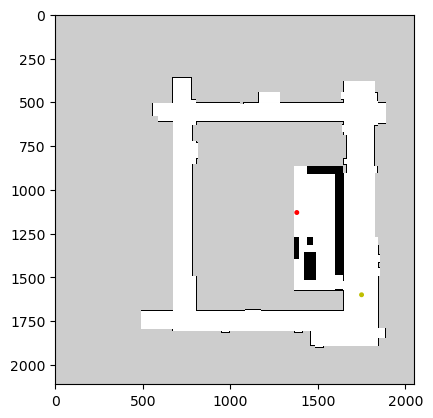

In [ ]:
fig, ax = plt.subplots()
image = mpimg.imread("Maps/a2230_map_closed_fliped.png")
start = Point(1380, 1130)
end = Point(1750, 1600)

plt.imshow(image)
ax.add_artist(plt.Circle((start.x, start.y), 10, color='r'))
ax.add_artist(plt.Circle((end.x, end.y), 10, color='y'))
plt.show()

In [3]:
map_img = 1-np.array(image[:,:,1])
print(map_img.shape)
mat_map = map_img
map = BMPMap(width=map_img.shape[1], height=map_img.shape[0], mat=mat_map)

(2112, 2048)


## Trajectoire avec A*

In [4]:
from lab_utils.astart import AStarPlanner
astarPlanner = AStarPlanner(map=map, step_size=10, heuristic_dist='Euclidean')
astarPlanner.plan(start=start, target=end)

Done !


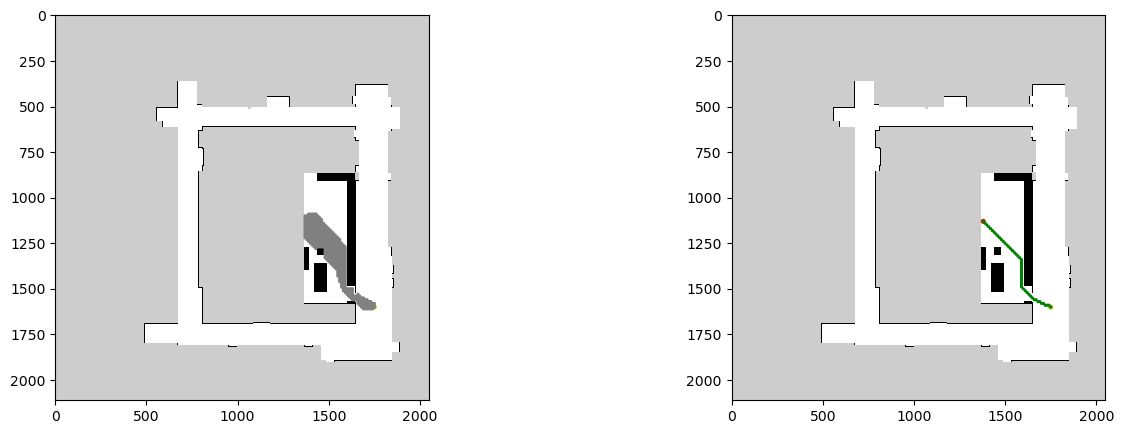

In [5]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(image)
ax.add_artist(plt.Circle((start.x, start.y), 10, color='r'))
ax.add_artist(plt.Circle((end.x, end.y), 10, color='y'))
for i in range(len(astarPlanner.open_list)-1):
    pt = astarPlanner.open_list[i].pos.tuple()
    ax.add_artist(plt.Circle((pt[0], pt[1]), 5, color='gray'))
for i in range(len(astarPlanner.close_list)-1):
    pt = astarPlanner.close_list[i].pos.tuple()
    ax.add_artist(plt.Circle((pt[0], pt[1]), 5, color='gray'))

ax2 = fig.add_subplot(1, 2, 2)
plt.imshow(image)
ax2.add_artist(plt.Circle((start.x, start.y), 10, color='r'))
ax2.add_artist(plt.Circle((end.x, end.y), 10, color='y'))
for i in range(len(astarPlanner.finalPath)-1):
    pt = astarPlanner.finalPath[i].tuple()
    ax2.add_artist(plt.Circle((pt[0], pt[1]), 5, color='g'))
plt.show()

## Trajectoire avec RRT

In [6]:
from lab_utils.rrt import RRTPlanner
rrtPlanner = RRTPlanner(map, epsilon=0.05, stepSize=20)
rrtPlanner.plan(start=start, target=end)

final


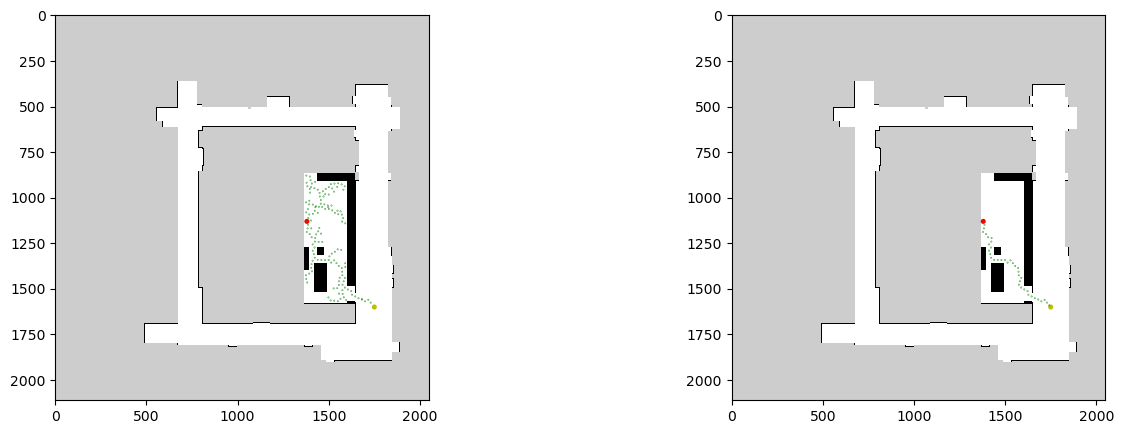

In [7]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(image)
ax.add_artist(plt.Circle((start.x, start.y), 10, color='r'))
ax.add_artist(plt.Circle((end.x, end.y), 10, color='y'))
for i in range(len(rrtPlanner.nodeList)-1):
    pt = rrtPlanner.nodeList[i].pos.tuple()
    ax.add_artist(plt.Circle((pt[0], pt[1]), 1, color='g'))
ax2 = fig.add_subplot(1, 2, 2)
plt.imshow(image)
ax2.add_artist(plt.Circle((start.x, start.y), 10, color='r'))
ax2.add_artist(plt.Circle((end.x, end.y), 10, color='y'))
for i in range(len(rrtPlanner.finalPath)-1):
    pt = rrtPlanner.finalPath[i].tuple()
    ax2.add_artist(plt.Circle((pt[0], pt[1]), 1, color='g'))
plt.show()